# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file="traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

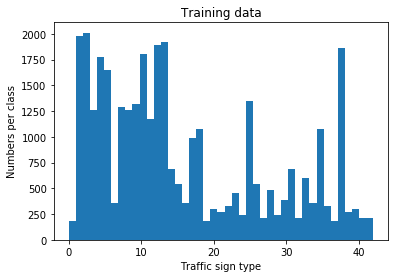

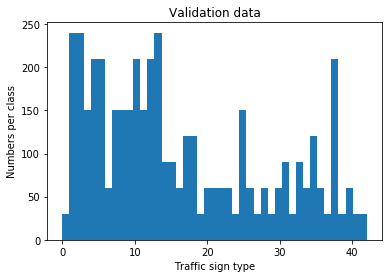

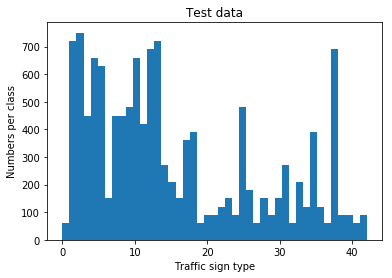

In [4]:
nbins = n_classes
plt.hist(y_train, nbins)
plt.title("Training data")
plt.xlabel("Traffic sign type")
plt.ylabel("Numbers per class")
plt.show()


plt.hist(y_valid, nbins)
plt.title("Validation data")
plt.xlabel("Traffic sign type")
plt.ylabel("Numbers per class")
plt.show()


plt.hist(y_test, nbins)
plt.title("Test data")
plt.xlabel("Traffic sign type")
plt.ylabel("Numbers per class")
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import numpy as np
from skimage import color,transform
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten


In [6]:
#create a function to draw multiple images
def show_images(imgs, labels, rows = 1, cols = 1):
    figure, axes = plt.subplots(rows, cols,figsize=(3*cols,3*rows))
    axes = axes.ravel()
    for index in range(len(imgs)):
        axes[index].imshow(imgs[index], plt.gray())
        if(labels != None):
           axes[index].set_title(labels[index])
        else:
            axes[index].set_title(seq)

Check images number per class.As we saw below, numbers of images per class are quite different. I should try to produce some images to balance among classes

In [7]:
#total labels data
def imgs_num_per_class(labels):
    classes = set(labels)
    num_classes = len(classes)
    num_per_class = []

    for label in classes:
        instance = [0,0]
        instance[0] = label
        instance[1] = sum(labels == label)
        num_per_class.append(instance)

    return num_per_class

SimilarityTransform. To produce more images.

In [9]:
#SimilarityTransform
def img_random_transform(img, scale=[0.9,1.1], rotation=[-10.0,10.0], transf=[-2,2]):

    rotation_random = np.random.uniform(low=rotation[0],high=rotation[1],size=None)
    rotation_random = np.deg2rad(rotation_random)
    scale_random = np.random.uniform(low=scale[0],high=scale[1],size=None)
    translation_x = np.random.randint(low=transf[0],high=transf[1]+1,size=None)
    translation_y = np.random.randint(low=transf[0],high=transf[1]+1,size=None)

    #calcult transform mat
    tform = transform.SimilarityTransform(scale=scale_random, rotation=rotation_random,
                               translation=(translation_y, translation_x))

    rotated = transform.warp(img, tform)

    return rotated

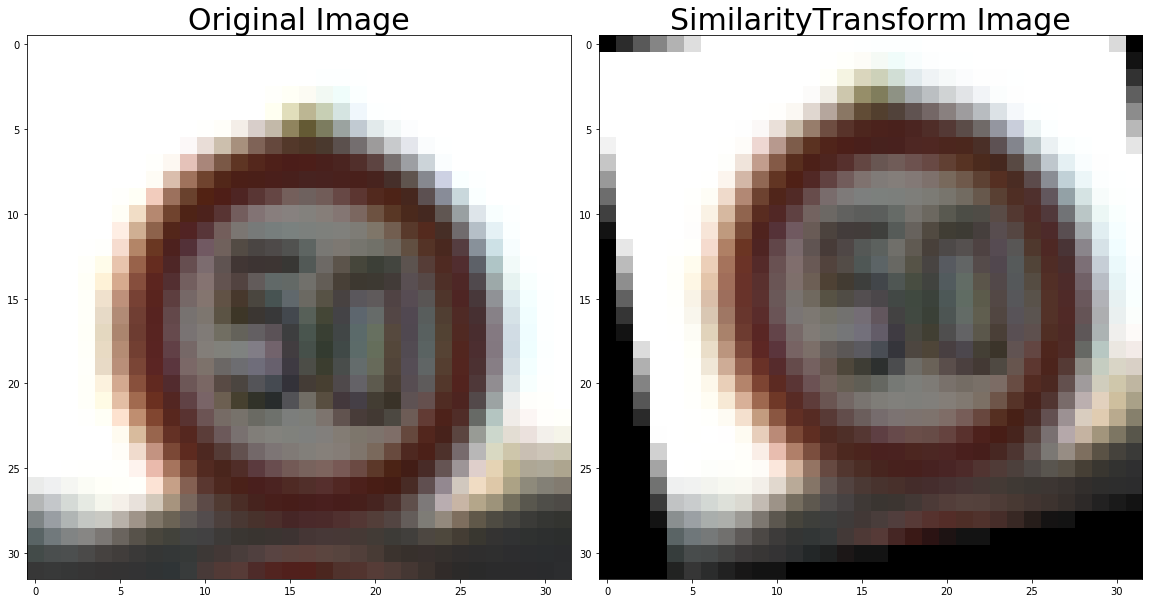

In [11]:
img = X_train[np.random.randint(low=0, high=n_train+1, size=None)]
img_random = img_random_transform(img)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(img_random)
ax2.set_title('SimilarityTransform Image', fontsize=30)

Ok, img_random_transform works well. Let's produce some new images based on original images

In [12]:
def generate_imgs(imgs, labels, num):
    num_remain_total = 0

    num_per_class = imgs_num_per_class(labels)

    num_remain_per_class = [ num-num_per_class[i][1] for i in range(len(num_per_class))]

    imgs_expend = []
    labels_expend = []

    for x in range(len(num_per_class)):
        if num_remain_per_class[x] <= 0:
            continue

        for y in range(num_remain_per_class[x]):
            # random selset num_remain_per_class[x] images, and call img_random_transform to produce new images
            img_location = np.argwhere(labels == num_per_class[x][0])

            i = np.random.choice(list(zip(*img_location))[0],size=None,replace=True)
            new_img = img_random_transform(imgs[i])
            #new_img = random_transform(imgs[i])
            
            #add new image to new dataset
            imgs_expend.append(new_img)
            labels_expend.append(num_per_class[x][0])

    return  imgs_expend, labels_expend

Test func: generate_imgs

In [12]:
imgs_extra, labels_extra = generate_imgs(X_train, y_train, 4000)


In [13]:
new_train = np.array(list(X_train) + list(imgs_extra))
new_train_label = np.array(list(y_train) + list(labels_extra))
print(imgs_num_per_class(new_train_label))

[[0, 4000], [1, 4000], [2, 4000], [3, 4000], [4, 4000], [5, 4000], [6, 4000], [7, 4000], [8, 4000], [9, 4000], [10, 4000], [11, 4000], [12, 4000], [13, 4000], [14, 4000], [15, 4000], [16, 4000], [17, 4000], [18, 4000], [19, 4000], [20, 4000], [21, 4000], [22, 4000], [23, 4000], [24, 4000], [25, 4000], [26, 4000], [27, 4000], [28, 4000], [29, 4000], [30, 4000], [31, 4000], [32, 4000], [33, 4000], [34, 4000], [35, 4000], [36, 4000], [37, 4000], [38, 4000], [39, 4000], [40, 4000], [41, 4000], [42, 4000]]


After getting new train data set, we should norimalize images.

In [7]:
def img_norimalize(dataset):
    gray = np.sum(dataset/3, axis=3, keepdims=True)
    gray = (gray - 128.0)/255
    return gray


In [8]:
#from sklearn.model_selection import train_test_split

X_train_new = img_norimalize(X_train)
y_train_new = y_train
#X_train_new = img_norimalize(new_train)
#y_train_new = new_train_label
X_valid_new = img_norimalize(X_valid)
y_valid_new = y_valid

X_test_new = img_norimalize(X_test)
y_test_new = y_test


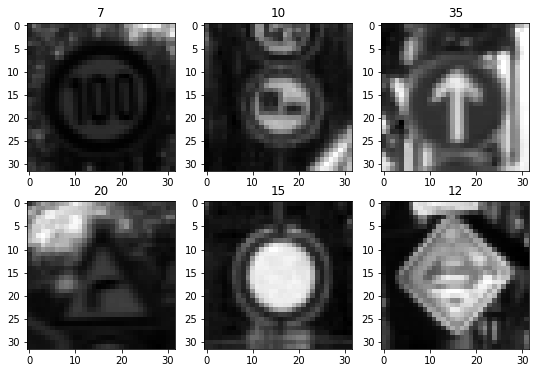

In [9]:
#check gray imgs
images = {}
labels = {}
index = np.random.randint(low=0, high=n_train+1, size=6)
for i in range(6):
    labels[i] = str(y_train_new[index[i]])
    images[i] = X_train_new[index[i]].squeeze()
    
show_images(images, labels, 2, 3)

In [15]:
print(X_train_new.shape)
print(len(y_train_new))

(34799, 32, 32, 1)
34799


In [16]:
print(X_valid_new.shape)
print(len(y_valid_new))

(4410, 32, 32, 1)
4410


### Model Architecture

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [11]:
#LeNet
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1,1,1,1], padding='VALID')+ conv1_b
    
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding='VALID')+ conv2_b
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    #fc0 = tf.concat([flatten(conv2), flatten(conv1)],1 )
    #drop_fc0 = tf.nn.dropout(fc0, keep_prob)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(fc0._shape[1].value, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    drop_fc1 = tf.nn.dropout(fc1, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2   = tf.matmul(drop_fc1, fc2_W) + fc2_b
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    drop_fc2 = tf.nn.dropout(fc2, keep_prob)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(drop_fc2._shape[1].value, 43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits   = tf.matmul(drop_fc2, fc3_W) + fc3_b   
    
    return logits

In [17]:

def ConvNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # First layer 
    output_layer1 = 64
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, output_layer1), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(output_layer1))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    relu_conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. 
    pool_conv1 = tf.nn.max_pool(relu_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #dropout
    drop_conv1 = tf.nn.dropout(pool_conv1, keep_prob)

    # SOLUTION: Layer 2: Convolutional. Output = 5x5x200.
    output_layer2 = 128
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, output_layer1, output_layer2), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(output_layer2))
    conv2   = tf.nn.conv2d(drop_conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    relu_conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling
    pool_conv2 = tf.nn.max_pool(relu_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #dropout
    drop_conv2 = tf.nn.dropout(pool_conv2, keep_prob)
    
     # SOLUTION: Layer 3: Convolutional.
    output_layer3 = 200
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, output_layer2, output_layer3), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(output_layer3))
    conv3   = tf.nn.conv2d(drop_conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # SOLUTION: Activation.
    relu_conv3 = tf.nn.relu(conv3)

    # SOLUTION: Pooling
    pool_conv3 = tf.nn.max_pool(relu_conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #dropout
    drop_conv3 = tf.nn.dropout(pool_conv3, keep_prob)   
    
    #connect 2 flats
    fc0 = tf.concat([flatten(drop_conv3), flatten(drop_conv2)],1 )
    
    drop_fc1 = tf.nn.dropout(fc0, keep_prob)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    output_layer4 = 120
    fc1_W = tf.Variable(tf.truncated_normal(shape=(fc0._shape[1].value, output_layer4), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(output_layer4))
    fc1   = tf.matmul(drop_fc1, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    relu_fc1    = tf.nn.relu(fc1)
    #dropout
    drop_fc1 = tf.nn.dropout(relu_fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 43.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(output_layer4, 43), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(43))
    logits    = tf.matmul(drop_fc1, fc2_W) + fc2_b

    return logits

In [18]:
def ConvNet2(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    #keep_prob = 0.5
    
    # First layer 
    output_layer1 = 6
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, output_layer1), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(output_layer1))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    relu_conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. 
    pool_conv1 = tf.nn.max_pool(relu_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #dropout
    drop_conv1 = tf.nn.dropout(pool_conv1, keep_prob)

    # SOLUTION: Layer 2: Convolutional. Output = 5x5x200.
    output_layer2 = 16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, output_layer1, output_layer2), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(output_layer2))
    conv2   = tf.nn.conv2d(drop_conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    relu_conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling
    pool_conv2 = tf.nn.max_pool(relu_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #dropout
    drop_conv2 = tf.nn.dropout(pool_conv2, keep_prob)
    
     # SOLUTION: Layer 3: Convolutional.
    output_layer3 = 400
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, output_layer2, output_layer3), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(output_layer3))
    conv3   = tf.nn.conv2d(drop_conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # SOLUTION: Activation.
    relu_conv3 = tf.nn.relu(conv3)
    
    #connect 2 flats
    fc0 = tf.concat([flatten(relu_conv3), flatten(drop_conv2)],1 )
    
    drop_fc0 = tf.nn.dropout(fc0, keep_prob)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    output_layer4 = 120
    fc1_W = tf.Variable(tf.truncated_normal(shape=(drop_fc0._shape[1].value, output_layer4), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(output_layer4))
    fc1   = tf.matmul(drop_fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    relu_fc1    = tf.nn.relu(fc1)
    #dropout
    drop_fc1 = tf.nn.dropout(relu_fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 43.
    output_layer5 = 84
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(output_layer4, output_layer5), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(output_layer5))
    fc2    = tf.matmul(drop_fc1, fc2_W) + fc2_b

    relu_fc2    = tf.nn.relu(fc2)
    #dropout
    drop_fc2 = tf.nn.dropout(relu_fc2, keep_prob)
 

    fc3_W = tf.Variable(tf.truncated_normal(shape=(drop_fc2._shape[1].value, 43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits   = tf.matmul(drop_fc2, fc3_W) + fc3_b   
    return logits

In [10]:
def ConvNet3(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # First layer 
    output_layer1 = 6
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, output_layer1), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(output_layer1))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    relu_conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. 
    #pool_conv1 = tf.nn.max_pool(relu_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #dropout
    drop_conv1 = tf.nn.dropout(relu_conv1, keep_prob)

    # SOLUTION: Layer 2: Convolutional. Output = 5x5x200.
    output_layer2 = 16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, output_layer1, output_layer2), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(output_layer2))
    conv2   = tf.nn.conv2d(drop_conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    relu_conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling
    pool_conv2 = tf.nn.max_pool(relu_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #dropout
    #drop_conv2 = tf.nn.dropout(pool_conv2, keep_prob)
    
     # SOLUTION: Layer 3: Convolutional.
    output_layer3 = 200
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, output_layer2, output_layer3), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(output_layer3))
    conv3   = tf.nn.conv2d(pool_conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # SOLUTION: Activation.
    relu_conv3 = tf.nn.relu(conv3)

    # SOLUTION: Pooling
    pool_conv3 = tf.nn.max_pool(relu_conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #dropout
    #drop_conv3 = tf.nn.dropout(pool_conv3, keep_prob)   
    
    #connect 2 flats
    fc0 = tf.concat([flatten(pool_conv3), flatten(pool_conv2)],1 )
    
    drop_fc0 = tf.nn.dropout(fc0, keep_prob)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    output_layer4 = 120
    fc1_W = tf.Variable(tf.truncated_normal(shape=(drop_fc0._shape[1].value, output_layer4), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(output_layer4))
    fc1   = tf.matmul(drop_fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    relu_fc1    = tf.nn.relu(fc1)
    #dropout
    drop_fc1 = tf.nn.dropout(relu_fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 43.
    output_layer5 = 84
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(output_layer4, output_layer5), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(output_layer5))
    fc2    = tf.matmul(drop_fc1, fc2_W) + fc2_b
    relu_fc2    = tf.nn.relu(fc2)

    fc3_W = tf.Variable(tf.truncated_normal(shape=(output_layer5, 43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits   = tf.matmul(relu_fc2, fc3_W) + fc3_b   
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [1]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [11]:
tf.reset_default_graph()
# placeholders
x = tf.placeholder(dtype=tf.float32, shape=(None, 32, 32,1))
y = tf.placeholder(dtype=tf.int64, shape=None)
one_hot_y = tf.one_hot(y,43)
keep_prob = tf.placeholder(tf.float32)

# training pipeline
lr = 0.0009
logits = ConvNet3(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)

loss_function = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
training_operation = optimizer.minimize(loss=loss_function)



In [13]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y,1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [18]:
EPOCHS = 60
BATCH_SIZE = 128


In [24]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_new)
    print('Training... \n')
    summary_train = []
    #map for reduction of l_rate at different EPOCHS(first elt)
  

    for epoch in range(EPOCHS):      
        X_train_new,y_train_new = shuffle(X_train_new,y_train_new)
        for offset in range(0,num_examples,BATCH_SIZE):
            end = offset + BATCH_SIZE
            #batch_x,batch_y = X_train_new[offset:end],y_train_new[offset:end]
            batch_x,batch_y = X_train_new[offset:end],y_train_new[offset:end]
            sess.run(training_operation,feed_dict={x:batch_x,y:batch_y,keep_prob: 0.5})

        validation_accuracy = evaluate(X_valid_new,y_valid_new)

        print("EPOCH {} ...".format(epoch+1))
        print("Accuracy = {:.3f}".format(validation_accuracy))
        print()

    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, './traffic_model')
    print('Model saved')

Training... 

EPOCH 1 ...
Accuracy = 0.549

EPOCH 2 ...
Accuracy = 0.833

EPOCH 3 ...
Accuracy = 0.909

EPOCH 4 ...
Accuracy = 0.933

EPOCH 5 ...
Accuracy = 0.950

EPOCH 6 ...
Accuracy = 0.963

EPOCH 7 ...
Accuracy = 0.962

EPOCH 8 ...
Accuracy = 0.970

EPOCH 9 ...
Accuracy = 0.971

EPOCH 10 ...
Accuracy = 0.973

EPOCH 11 ...
Accuracy = 0.975

EPOCH 12 ...
Accuracy = 0.981

EPOCH 13 ...
Accuracy = 0.973

EPOCH 14 ...
Accuracy = 0.980

EPOCH 15 ...
Accuracy = 0.972

EPOCH 16 ...
Accuracy = 0.981

EPOCH 17 ...
Accuracy = 0.982

EPOCH 18 ...
Accuracy = 0.982

EPOCH 19 ...
Accuracy = 0.982

EPOCH 20 ...
Accuracy = 0.984

EPOCH 21 ...
Accuracy = 0.979

EPOCH 22 ...
Accuracy = 0.980

EPOCH 23 ...
Accuracy = 0.985

EPOCH 24 ...
Accuracy = 0.984

EPOCH 25 ...
Accuracy = 0.981

EPOCH 26 ...
Accuracy = 0.984

EPOCH 27 ...
Accuracy = 0.984

EPOCH 28 ...
Accuracy = 0.984

EPOCH 29 ...
Accuracy = 0.984

EPOCH 30 ...
Accuracy = 0.979

EPOCH 31 ...
Accuracy = 0.986

EPOCH 32 ...
Accuracy = 0.983

EPO

As tride, LeNet's accuracy could reach 0.973, ConvNet's accuracy could reach 0.981, ConvNet2's accuracy could reach only 0.924, and ConvNet3's accuracy reach 0.985 finally.
So I pick ConvNet3 as the model.Let's check on test data.

In [25]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./traffic_model.meta')
    saver2.restore(sess, "./traffic_model")
    test_accuracy = evaluate(X_test_new, y_test_new)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./traffic_model
Test Set Accuracy = 0.975


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [14]:
import pandas as pd
#read signnames.csv

sign_name = pd.read_csv('signnames.csv')  

print(sign_name)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

### Load and Output the Images

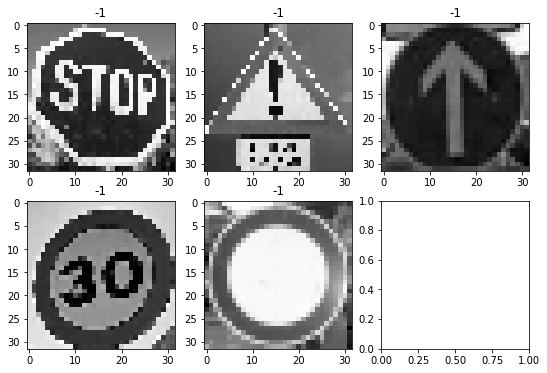

In [15]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
import os
test_imgs = os.listdir("./test-imgs/")

test_imgs_data_resize = []
test_imgs_data = []
test_imgs_label = []

#resize images
for img in test_imgs:
    #read img
    img_data = cv2.imread("./test-imgs/"+img)

    #resize to 32x32
    resize_img = cv2.resize(img_data,(32, 32))
    
    test_imgs_data_resize.append(np.array(resize_img))
    test_imgs_label.append(-1)

#normalize images
test_imgs_data = img_norimalize(np.array(test_imgs_data_resize))    


test_imgs_show = []
for i in range(len(test_imgs)):
    test_imgs_show.append(test_imgs_data[i].squeeze())

#show imgs    
show_images(test_imgs_show, test_imgs_label, 2, 3)


In [16]:
#write labels
test_imgs_label = [14, 18, 35, 1, 15]

### Predict the Sign Type for Each Image

In [19]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./traffic_model.meta')
    saver3.restore(sess, "./traffic_model")
    
    # test accuracy of each image
    for i in range(len(test_imgs_data)):
        img = [test_imgs_data[i]]
        label = [test_imgs_label[i]]
        accuracy = evaluate(img, label)
        print("prediction for image {} = {:.2f}".format(i+1, accuracy))
            


INFO:tensorflow:Restoring parameters from ./traffic_model
prediction for image 1 = 1.00
prediction for image 2 = 1.00
prediction for image 3 = 1.00
prediction for image 4 = 1.00
prediction for image 5 = 1.00


### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

As seen, the model prediction for 5 new images is 100%. It did well

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./traffic_model


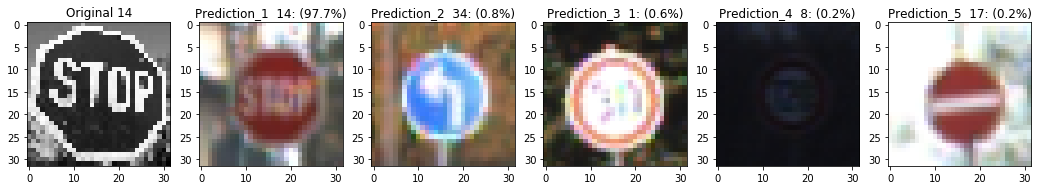

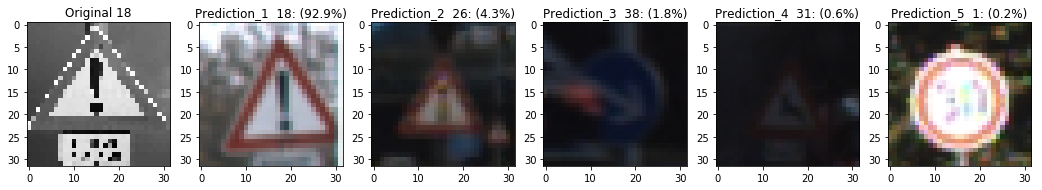

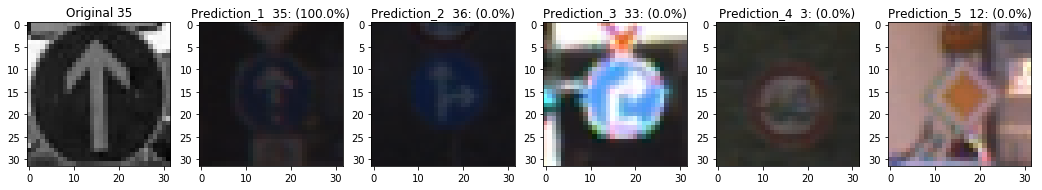

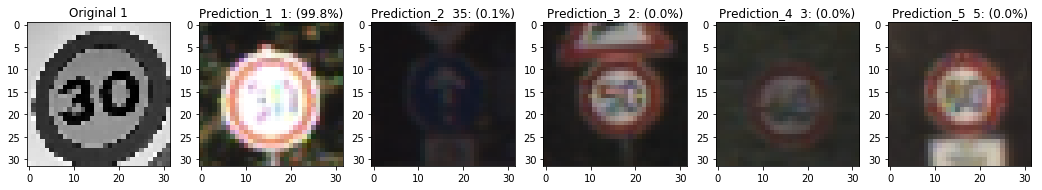

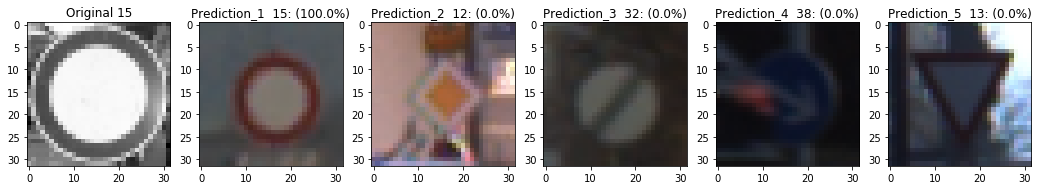

In [24]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

softmax = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax, 5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver4 = tf.train.import_meta_graph('./traffic_model.meta')
    saver4.restore(sess, "./traffic_model")
    
    #get softmax logits of german sign images
    softmax_logits = sess.run(softmax, feed_dict={x: test_imgs_data, keep_prob:1.0})
    
    #get top k probability of german sign images
    result_top_k = sess.run(top_k, feed_dict={x: test_imgs_data, keep_prob:1.0})

    for i in range(len(test_imgs_data)):
        images = {}
        labels = {}
        
        #original image and label
        images[0] = test_imgs_data[i].squeeze()
        labels[0] = "Original "+ str(test_imgs_label[i])

        #prepare the labels and images from validation set
        for j in range(5):
            labels[j+1] = 'Prediction_{}  {:.0f}: ({:.1f}%)'.format(j+1, result_top_k[1][i][j], 100*result_top_k[0][i][j])
            images[j+1] = X_valid[np.argwhere(y_valid == result_top_k[1][i][j])[0]].squeeze()
            
        show_images(images, labels, 1, 6)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")